In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv("credit_data.csv")
df

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [2]:
np.unique(df['default'])

array([0, 1], dtype=int64)

<Axes: xlabel='default', ylabel='count'>

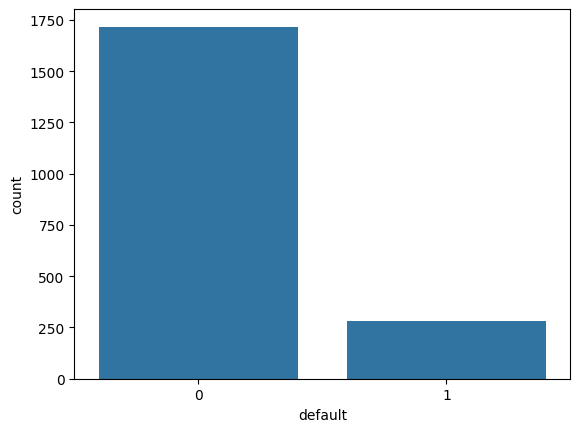

In [3]:
sns.countplot(x = df['default'])

In [4]:
df.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [5]:
# Isso substitui os valores nulos pela media de idade
df['age'] = df['age'].fillna(df['age'].mean())

In [10]:
x_credit = df.iloc[:, 1:4].values
y_credit = df.iloc[:, 4].values

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_credit = scaler.fit_transform(x_credit)

In [13]:
x_credit

array([[ 1.45393393,  1.33786439,  1.20281942],
       [-0.76217555,  0.53704215,  0.69642695],
       [ 0.83682073,  1.63843621,  1.17471147],
       ...,
       [-0.07122592, -0.93972115,  0.35420081],
       [-0.11000289,  1.7018964 , -0.92675625],
       [ 1.682986  ,  1.1274146 ,  0.96381038]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_credit_train, x_credit_test, y_credit_train, y_credit_test = train_test_split(x_credit, y_credit, test_size=0.25, random_state=0)

In [12]:
x_credit_train.shape, x_credit_test.shape

((1500, 3), (500, 3))

In [14]:
from sklearn.svm import SVC
svm_credit = SVC(kernel='linear', C = 1.0)
svm_credit.fit(x_credit_train, y_credit_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
previsoes = svm_credit.predict(x_credit_test)

In [16]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [17]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_test, previsoes)

0.95

0.95

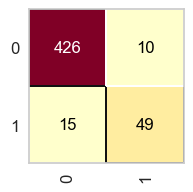

In [18]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(svm_credit)
cm.fit(x_credit_train, y_credit_train)
cm.score(x_credit_test, y_credit_test)